In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score 

from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv('Clean_DF.csv',parse_dates = True, index_col=0)

In [6]:
df.head()

,Open,High,Low,Close,Compound_Score,Total Volume of Tweets,Weighted_Price
0,2763.23,2763.24,2761.41,2762.00,0.082893,1027.0,2761.710702
1,2768.07,2772.97,2768.07,2768.07,0.053160,778.0,2772.411512
2,2779.77,2779.78,2779.77,2779.78,0.124251,836.0,2779.774992
3,2790.55,2793.25,2790.55,2790.55,-0.021037,984.0,2792.693685
4,2837.44,2837.44,2831.40,2831.40,0.055437,751.0,2832.734750
...,...,...,...,...,...,...,...
12931,3536.47,3538.27,3536.47,3538.27,0.048459,1060.0,3537.406211
12932,3548.22,3548.22,3543.23,3545.46,0.059675,978.0,3546.670863
12933,3545.73,3545.74,3545.73,3545.74,0.111140,917.0,3545.736842
12934,3543.39,3543.39,3543.39,3543.39,0.057693,929.0,3543.390000


In [7]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100

In [9]:
df = df[['Weighted_Price','High_Low_per','Total Volume of Tweets','Compound_Score']]

In [10]:
label_col = 'Weighted_Price'

In [11]:
forecast_ceil = int(math.ceil(0.001*len(df)))

In [12]:
df['label'] = df[label_col].shift(-forecast_ceil)

<ipython-input-12-faebf4879c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[label_col].shift(-forecast_ceil)


In [13]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [14]:
df.dropna(inplace=True)

<ipython-input-14-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [15]:
y = np.array(df['label'])

In [30]:
df

,Weighted_Price,High_Low_per,Per_change,Total Volume of Tweets,label
0,2761.710702,0.044895,0.0,1027.0,2871.206407
1,2772.411512,0.177019,0.0,778.0,2899.787877
2,2779.774992,0.000000,0.0,836.0,2879.737436
3,2792.693685,0.096755,0.0,984.0,2753.844151
4,2832.734750,0.213322,0.0,751.0,2690.177604
...,...,...,...,...,...
12918,3544.657175,0.096532,0.0,791.0,3537.406211
12919,3544.260025,0.012698,0.0,658.0,3546.670863
12920,3541.194651,0.000000,0.0,1006.0,3545.736842
12921,3538.147070,0.000000,0.0,919.0,3543.390000


In [17]:
len(y)

12107

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
clf = svm.SVR(kernel='rbf') 

In [20]:
clf.fit(X_train, y_train) 

SVR()

In [26]:
pred_y=clf.predict(X_train)

In [28]:
errors = mean_squared_error(y_train, predy, squared = False)
print("RMSE = "+str(errors))

2514.548063611296

In [27]:
errors2 = mean_absolute_error(y_train, predy)
print("MAE = "+str(errors2))

1517.4009039222728

In [19]:
accuracy = clf.score(X_test, y_test)

In [20]:
print(accuracy) 

0.3538541669858912


In [21]:
forecast_set = clf.predict(X_lately)

In [22]:
print(forecast_set, accuracy) # stockprices next 30 days

[5591.54763097 5524.56714389 5629.26874226 5599.90715816 5650.04336491
 5584.97361858 5703.96529232 5640.64551818 5586.30649397 5619.98886716
 5540.90995547 5546.12380872 5501.53300048] 0.3538541669858912


In [23]:
df['Forecast'] = np.nan

<ipython-input-23-e44ce3a9a7b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


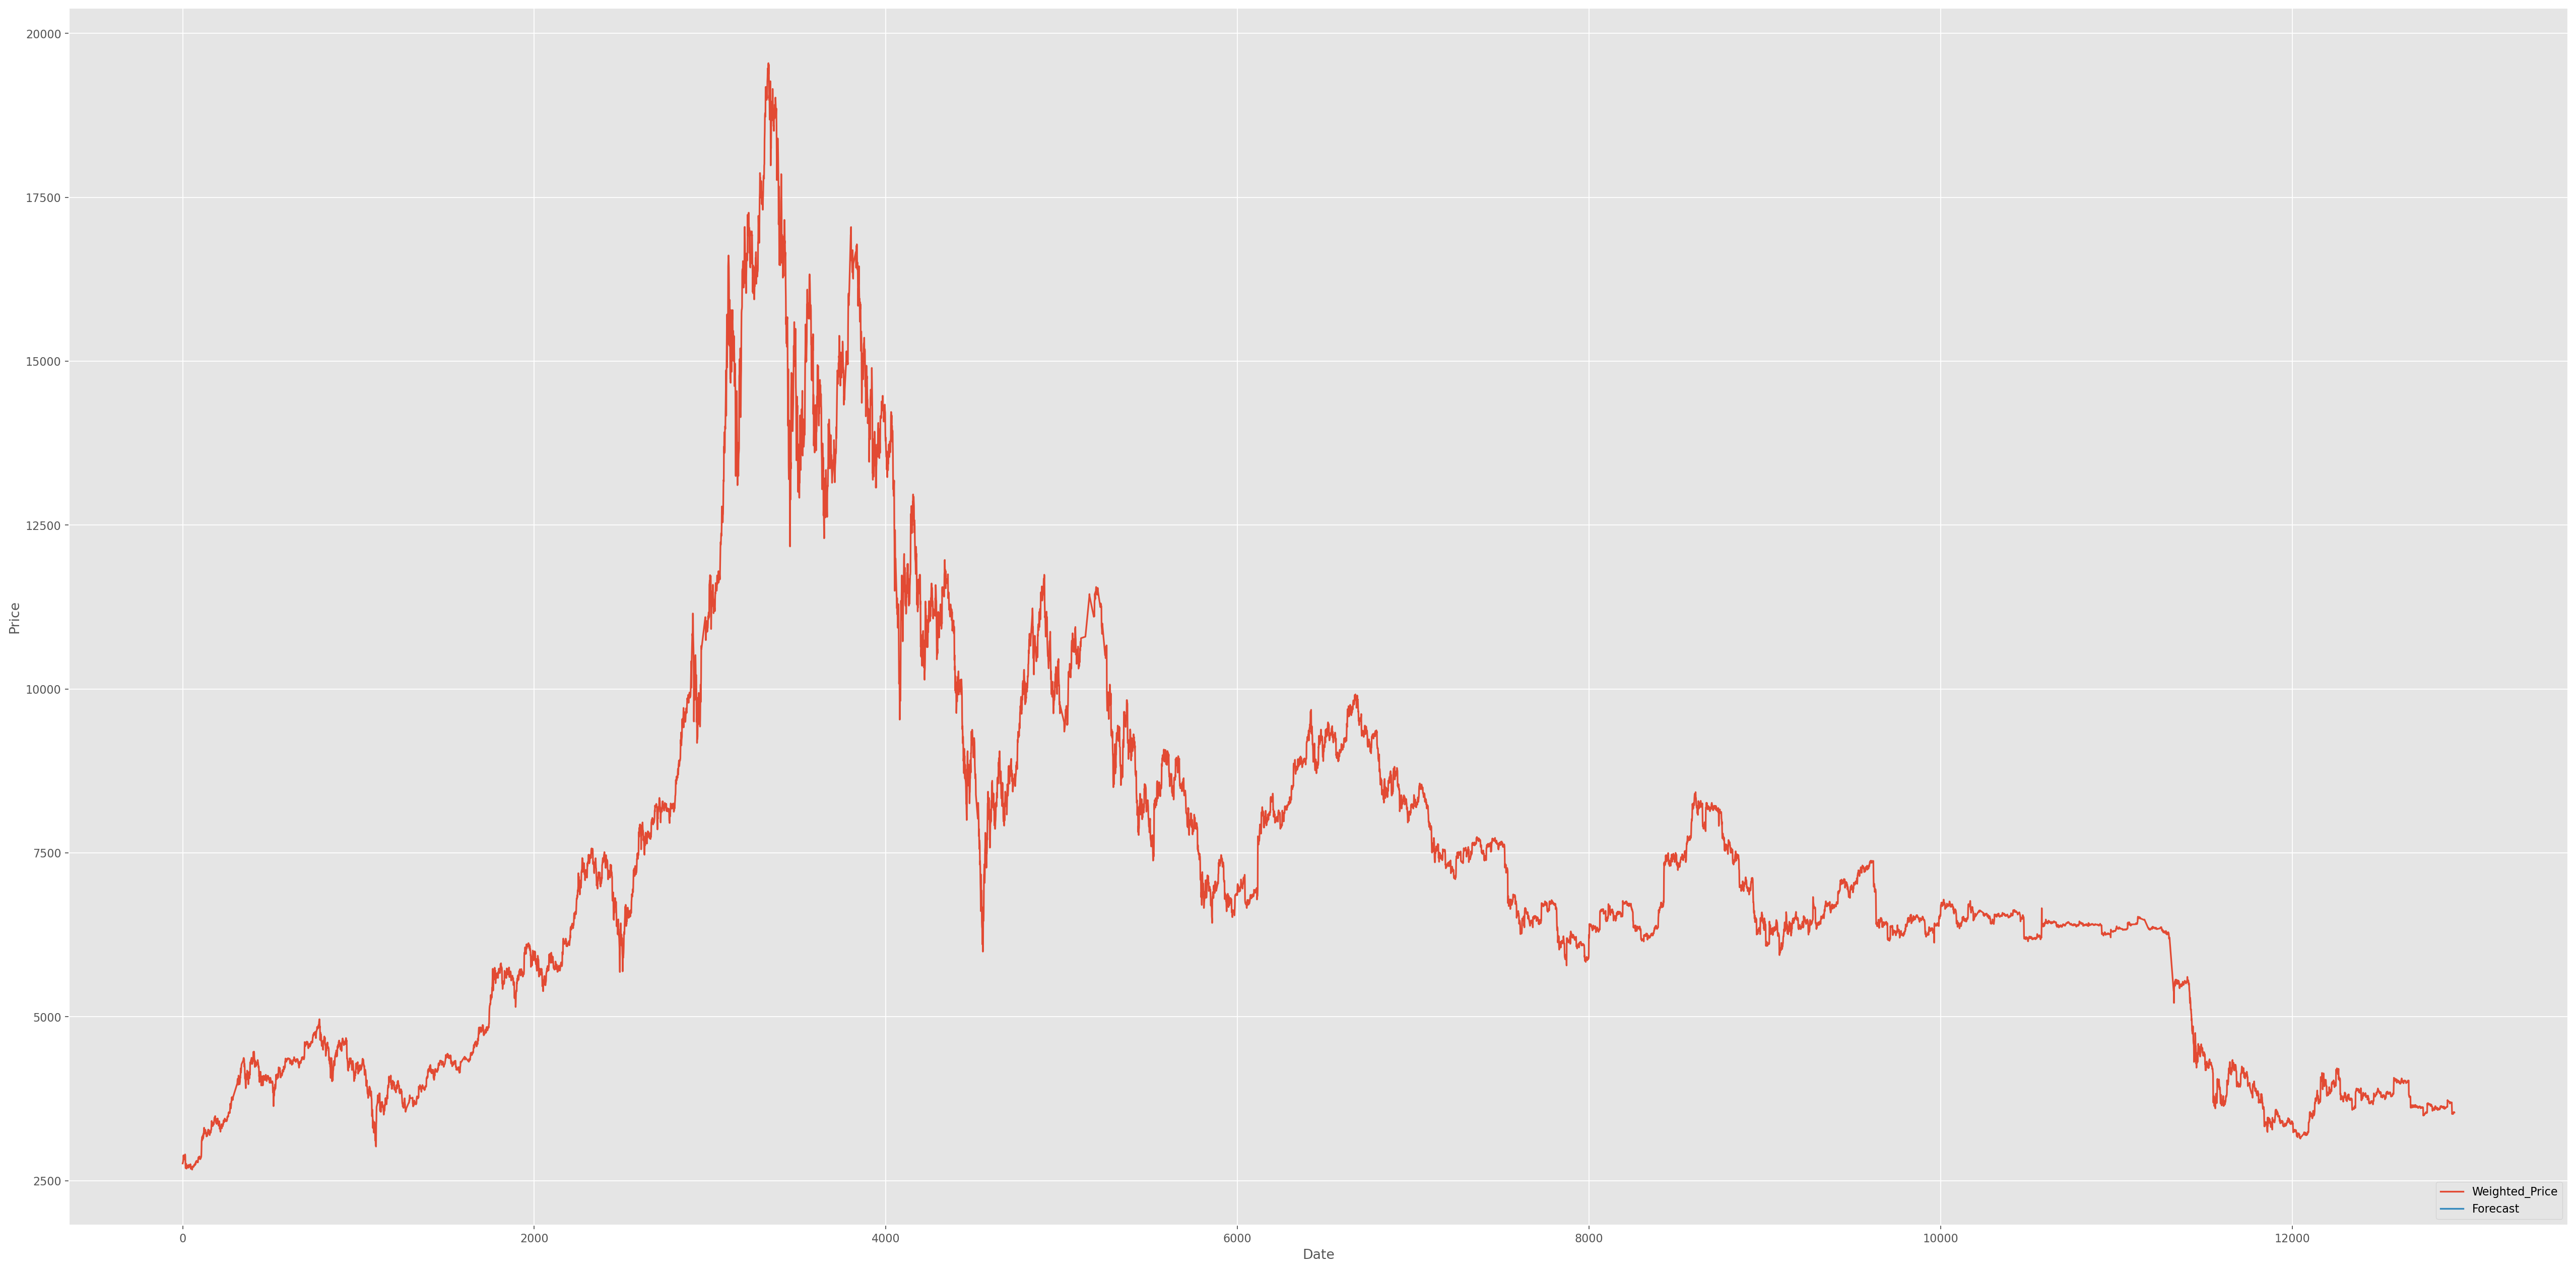

In [24]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
df['Weighted_Price'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()